In [71]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [17]:
# tickers = ['AAPL','XOM','KO','SAP','GS','ANET']
tickers = ['SAP','GS']

start=dt.datetime(2010,1,1)
end=dt.datetime(2025,7,1)
data = yf.download(tickers, start=start, end=end)


/tmp/ipython-input-17-2643429657.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)
[*********************100%***********************]  2 of 2 completed


In [18]:
data.head()

Price            Close                   High                    Low  \
Ticker              GS        SAP          GS        SAP          GS   
Date                                                                   
2010-01-04  132.649918  36.689579  133.546614  37.094559  129.913835   
2010-01-05  134.995132  36.463722  135.087098  36.790823  132.259061   
2010-01-06  133.554276  37.312622  134.412661  37.390502  133.171071   
2010-01-07  136.167725  38.293915  136.995447  38.426313  133.316686   
2010-01-08  133.592590  38.582085  135.983780  38.745633  133.316683   

Price                        Open               Volume           
Ticker            SAP          GS        SAP        GS      SAP  
Date                                                             
2010-01-04  36.580547  130.327702  36.783035   9135000  1456800  
2010-01-05  36.315750  132.588611  36.588331  11659400  1565600  
2010-01-06  36.775247  134.412661  36.860916   7381100  1753300  
2010-01-07  37.803269  133.600265  37.881148   8727400  3681800  
2010-01-08  38.130375  135.140738  38.169315   7268100  1794900

In [22]:
df=data['Close']
df.head()

Ticker,GS,SAP
Date,,
2010-01-04,132.649918,36.689579
2010-01-05,134.995132,36.463722
2010-01-06,133.554276,37.312622
2010-01-07,136.167725,38.293915
2010-01-08,133.592590,38.582085


/tmp/ipython-input-57-594998088.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


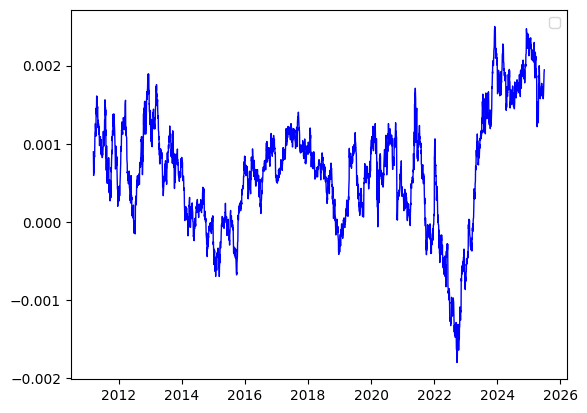

In [57]:
daily_return=df/df.shift(1)-1
daily_return.head()
smooth_return = daily_return['SAP'].rolling(window=300).mean()
plt.plot(smooth_return, color='blue', linewidth=1)


# daily_return['SAP'].plot()
plt.legend()
plt.show()

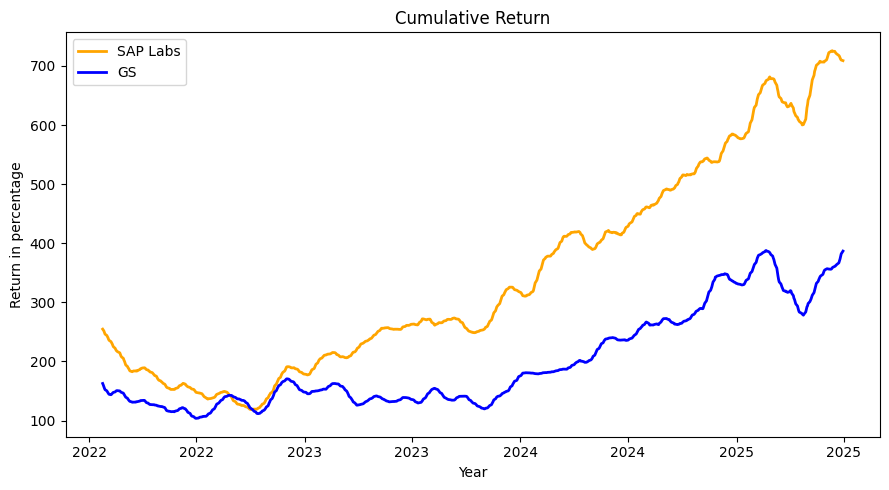

In [73]:
cum_return=((1+daily_return).cumprod()-1)*100


# In[33]:

cum_return_2022 = cum_return.loc['2022-01-01':].rolling(window=15).mean()

cum_return.head()


plt.figure(figsize=(9, 5))
plt.plot(cum_return_2022['SAP'], color='orange', linewidth=2, label='SAP Labs')
plt.plot(cum_return_2022['GS'], color='blue', linewidth=2, label='GS')

plt.xlabel('Year')
plt.ylabel('Return in percentage')
plt.title('Cumulative Return')
plt.legend()

# ✅ Simplest way to format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


In [70]:
daily_return.mean()

,0
Ticker,
GS,0.000596
SAP,0.000682


In [78]:
sharpe_ratio=daily_return.mean()/daily_return.std()


# In[37]:


sharpe_ratio

annual_sharpe_ratio=(252**0.5)*sharpe_ratio
annual_sharpe_ratio

,0
Ticker,
GS,0.519089
SAP,0.652351


In [82]:
neg_daily_return=daily_return[daily_return<0]


# In[41]:


neg_daily_return.head()


# In[42]:


sortino_ratio=daily_return.mean()/neg_daily_return.std()


# In[43]:


sortino_ratio


# In[44]:




,0
Ticker,
GS,0.045060
SAP,0.054168


In [81]:

annual_sortino_ratio=(252**0.5)*sortino_ratio


# In[45]:


annual_sortino_ratio

,0
Ticker,
GS,0.715303
SAP,0.859890


In [80]:
max_drawdown=(df.max()-df.min())/df.max()


# In[47]:


max_drawdown

,0
Ticker,
GS,0.903179
SAP,0.895447
